<a href="https://colab.research.google.com/github/Ethan9123/Complete-Python-Bootcamp/blob/master/intro_to_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# What are Neural Networks?

Neural networks, in a single line, attempt to iteratively train a set (or sets) of weights that, when used together, return the most accurate predictions for a set of inputs. Just like many of our past models, the model is trained using a loss function, which our model will attempt to minimize over iterations. Remember that a loss function is some function that takes in our predictions and the actual values and returns some sort of aggregate value that shows how accurate (or not) we were.

Neural networks do this by establishing sets of neurons (known as hidden layers) that take in some sort of input(s), apply a weight, and pass that output onward. As we feed more data into the network, it adjusts those weights based on the output of the loss function, until we have the outputs(predictions) close to of the real target values.

Why does one neuron turn out one way and a second neuron another? That's not generally something we can understand (though attempts have been made, such as Google's [Deep Dream](https://deepdreamgenerator.com/)). You can understand this as one kind of optimization problem.

![](./images/neuralnet.png)

Today, we're going to discuss some of the theory behind Neural Networks, particularly around the topology (the shape) of the network and how we iteratively fit/train/adjust the weights in the network to the data we are exposed to. We'll also write and investigate common neural network activation functions written with Python and Numpy. 

## Mapping out a Network

There are a lot of moving parts with Neural Networks. We'll be playing along with the very well known [Tensorflow Playground](http://playground.tensorflow.org/) as we talk about the structure of this neural networks. This website simulates a fairly small network in your browser and lets you tweak values and immediately realize their effects.

### What we know already

#### Features

Much like our other machine learning techniques, we do need to feed data into the network. For these smaller examples, we won't worry too much about the shape of our data, but typically having data normalized to be on scale between 0 and 1 (or -1 and 1) can help the network find a solution faster than when it would otherwise.

#### Outputs

Much like other supervised techniques, we need an output at the end as well. In most cases:

- for a regression style technique, one output is usually fine
- for a classification technique, one output is fine and one output per class is a good idea

### Starting Concepts

#### Neurons

A neural network (at its core) is made up of different neurons that are linked together. Each takes in either the original input features or some transformed version of them and puts out a value (or set of values). One neuron looks something akin to this:

![](./images/perceptron.jpg)

Each neuron is going to be the combination of the following:

- A **bias** term (akin to a constant or $B_{0}$ term in a linear regression)
- The input terms they've received, each multiplied by a **weight**

If our model has one neuron, this looks suspiciously similar to a linear regression:

1. take each term
2. multiply it by a weight
3. sum those new values together 
4. add an additional bias term

That output should, as we train our neural network, get closer and closer to what the expected true output is for that specific set of inputs ($x_1...x_n$). As we'll see, the way we train the network and the way we transform our outputs (plus the number of neurons) distinguishes neural networks from linear regression quite strongly.

That output should, as we train our neural network, get closer and closer to what the true expected output is for that specific set of inputs ($x_1...x_n$). As we'll see, the way we train the network and the way we transform our outputs (plus the number of neurons) distinguishes neural networks from linear regression quite strongly.

### Hidden Layers

What makes neural networks tick is the idea of hidden layers. Hidden does not mean anything particularly devious here, just that it is not the input or the output layer.

Hidden layers can have:
- any number of neurons per layer 
- can be of any number in your model**

At each layer each neuron in that layer receives the same input from the previous layer. However, each neuron is going to transform the data in a different way, based on how we assign or change the weights and bias in that neuron. 

![](./images/neuralnet.png)

For the network above, we have two hidden layers and one output layer.

- Hidden Layer 1
    - 4 Neurons
    - Each Neuron has 6 weights and 1 bias term
    - Inputs: the original (6) data
    - Outputs: one number per neuron
- Hidden Layer 2
    - 3 Neurons 
    - Each Neuron has 4 weights and 1 bias term
    - Inputs: the four outputs from each Neuron in Hidden Layer 1
    - Outputs: one number per neuron
- Output Layer
    - 1 Neuron
    - The one Neuron has 3 weights and 1 bias term
    - Inputs: the three outputs from each Neuron in Hidden Layer 2
    - Outputs: the final prediction

### Check for Understanding 1 (3 Minutes)

Answer the following about the network below:

![](./images/percept.png)

1. How many layers are in this network? Are they an input, output, or hidden layer? How many neurons are in each layer?
2. For your hidden and output layers:
    1. How many inputs does each neuron have?
    2. How many outputs does each neuron have?

### Activation

Neurons also have an activation function that transforms the output in a certain way. Some common examples are:

- [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks): Also known as a Rectified Linear Unit, this turns the output to 0 if the output would be less than 0 (i.e., take the output and feed it through $f(y) = max(0, y)$). This means that the neuron is activated when its output is positive and not activated otherwise. This has the intuitive effect of turning a neuron "on" in certain cases and off in other cases.
- [Softmax](https://en.wikipedia.org/wiki/Softmax_function): Used frequently at the output layer, this essentially "squishes" a bunch of inputs into a normalized scale of 0-1, which is great for creating something akin to a probability of falling into a given class. 
- [Sigmoid or Logistic](https://en.wikipedia.org/wiki/Logistic_function): Much like how we transformed the linear regression model to change the output to a zero or one through the use of a logistic or sigmoid function, we can do the same as an activation to squash the output to a scale between 0 and 1. 

There's a wealth of information on different types of activation functions within [this article](https://en.wikipedia.org/wiki/Activation_function) -- different activation functions, hidden layers, and neurons per layer can change how effective your neural network will be!

Typically, we'll apply the weights in our neurons, add the bias and sum all terms, then pass that one value through the activation function, like this:

![](./images/activation.png)

### Picking a Topology for your Network

There's no hard and fast rule for how to pick a topology for your neural network. Much like hyperparameters in other machine learning models, we're going to use a combination of experience, research, and exploration to come up with a topology that best suits our unique problem. One good place to start out is to (if you have a smaller set of input features) is a network with:

1. The input layer
2. One hidden layer with a number of neurons equal to one plus twice the number of inputs
3. One output layer with the appropriate activation function (softmax if you have a classification problem, no activation (or what's known as the identity function ($f(x) = x$) if you have a regression problem

It was proved in [Kolmogorov's Theorem](http://neuron.eng.wayne.edu/tarek/MITbook/chap2/2_3.html) that a 3-layer Neural Network with an appropriate topology can be used to approximate any continuous function.    

Note this is an existence therorem. There is no guranatee that you will find the right topology though we know there is always one Neural Network that can approximate your given continuous function.

### Single Layer and Multilayer Perceptrons (SLP and MLP)

The types of neural networks that we have discussed so far are known as perceptrons. A single layer perceptron **has no hidden layers** and is just a function of the inputs, weights, a bias term, and an activation function:

![](./images/slp.png)

Multilayer perceptrons (MLP) have 1 or more hidden layers in addition to their input and output layers. While SLPs are easiest to consider in an abstract sense, MLPs tend to be much more accurate and useful in practice. 

### Check for Understanding 2 (5 Minutes)

Work on the following activation functions:

- Binary Step
    - If $x \le 0$: $f(x) = 0$; else $f(x) = 1$ 
- ReLU
    - If $x \le 0$: $f(x) = 0$; else $f(x) = x$
- Logistic / Sigmoid
    - $f(x) = \frac{1}{1 + e^{-x}}$
- TanH
    - $f(x) = \tanh(x) = \frac{2}{1 + e^{-2x}} - 1$
- Softsign
    - $f(x)={\frac {x}{1+|x|}}$
    
Write a function in Python for each. Your functions should take in one value ($x$) and output the transformed version of $x$. Write another function to plot the fuction you designed in the x range of -10 to 10.

> Note: $e$ can be represented in the math library with `math.exp`.

In [0]:
def plotting(func, func_name):

#   addd you code
    y_vector = np.vectorize(func)
    plt.plot(x,y_vector(x))

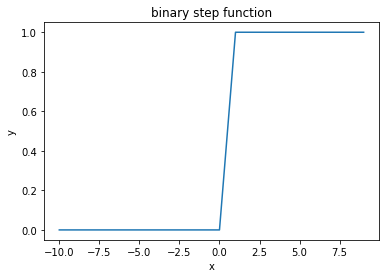

In [0]:
def binary_step(x):
# add your code
    return y
plotting(binary_step,"binary step function")

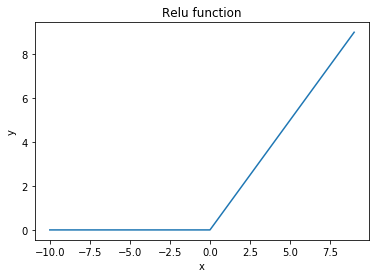

In [0]:
def Relu(x):
# add your code
    return y

plotting(Relu,"Relu function")

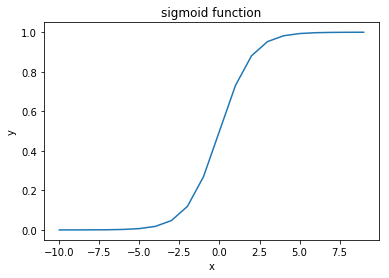

In [0]:
def sigmoid(x):
# add your code
    return y

plotting(sigmoid,"sigmoid function")


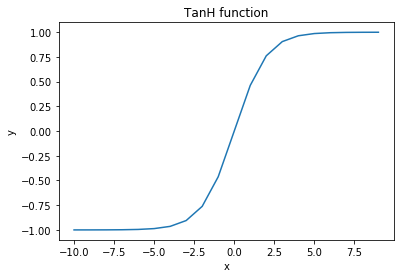

In [0]:
def TanH(x):
# add your code
    return y

plotting(TanH,"TanH function")


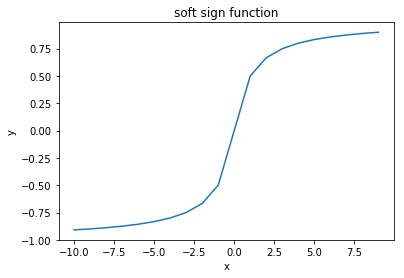

In [0]:
def softsign(x):
# add your code
    return y

plotting(softsign,"soft sign function")


## Training your network

So far, we haven't discussed how a neural network assigns the "right" weights to each of its neurons. You could imagine a neural network with very bad weights that predicted poorly or, in some cases, completely counter to what it should. How do we train our network to have the right weights?

Training our network to have the right weights relies on a couple of topics:

1. A loss function that we are trying to optimize the values for
2. The concept of forward and backward propogation 
3. Gradient Descent and a Learning Rate to make iterative changes to the weights

### Loss Functions

We have encountered [loss functions](https://en.wikipedia.org/wiki/Loss_function) many times before -- they are functions that take in the actual values for the output and what our model predicts those values to be and gives us a value that we are trying to minimize with our model. Examples include:

##### Regression: Sum of Squared Errors

$$\sum(y_i - \hat{y}_i)^2$$

##### Classification: Mean accuracy 

$$\frac{n_{\text{classified correctly}}}{n_{\text{total}}}$$

We're going to use loss functions in this context to tell us how well or how poorly our Neural Network is doing at that point.

### Forward and Backpropagation 

When we train our neural network, **we send our data multiple times through the network and tweak the weights each time**. This is an iterative process using forward and backpropagation.


#### Forward Propagation

Forward Propagation is straightforward -- either in batches or as individual observations, pass the training data through the network, applying all the weights, biases, and activation functions as usual. At this point, you should have actual and predicted values.

#### Backpropagation

What we want to do here is:

1. See how far off we were from the truth using the loss function
2. Change all of the weights to make our model more accurate, changing the weights that are "the worst" the most
3. Gradient descent is the core basis of how weights will be changed(updated).

This is known as **Backpropagation** -- we are taking the errors we see in our model (as it stands currently) and are distributing them backwards to the rest of the layers. 

What we'll do is train our data in a number of full passes known as **epochs**. As modelers, we'll choose a number of epochs to train our model, essentially choosing a value to stop where we see no additional change in the accuracy of our models. 

#### Changing Weights 

One question that you may have is "Why don't we just try all of the weights and decisively find the best one?" The problem here  is that we have _so many different weights_ to try out (and so many different sets of values to exhaustively attempt) that it's impractical to try all of them. More than being impractical, for larger models with many weights and many possible values, we may still be estimating the "best" weights long past the [heat death of the universe](https://en.wikipedia.org/wiki/Heat_death_of_the_universe). 

#### **Estimating** the Weights 

What we'll do instead is use gradient descent to help us figure out what direction to tweak our weights. We've discussed gradient descent before, but as a quick primer: 

> Gradient Descent is an optimization technique to help us find the lowest point (global minimum) of a function. The derivative (the rate of change in the function for a small change in the weights) of a function at a given point tells which direction we would like to change our weights. We'll make changes of a certain size in the right direction until we hit a place where the derivative is zero (i.e., either direction will increase the output of the function) and will consider that our "best" place. 

- **Learning Rate**: The size of the change we make on each pass -- bigger learning rates mean we'll move faster, but may overshoot a global minimum and converge to a local minimum instead
- **Epoch**: The number of times we pass our data through the fitting process

![](./images/gradient.png)

For our purposes, the function we're trying to optimize is the loss function from above -- we want the value of that function to be as low as possible. Our loss function is a function of all of the weights in our network. What we'll do in an abstract sense is:

1. Take the partial derivative (in other words, focus on one weight and not all) of our loss function with respect to each weight in our model
2. Based on that derivative, change the weights up or down

The actual process is somewhat more complicated than that (see below), but the takeaway is backpropagation **looks at how badly we did on each pass, moves those errors back up the model, and then uses gradient descent to change the weight over a series of iterations**.

![](./images/backprop.jpg)

##### The Vanishing Gradient Problem

One thing to keep in mind (and a good reason to not create networks that are very, very deep) is a phenomenon known as the Vanishing Gradient Problem. For networks with lots of hidden layers, earlier layers train at a much slower rate than layers closer to the output (the gradient "vanishes" as it gets deeper into the network, so the weights cannot change as much). That means that it can take a much longer time to train a deeper network without much increase in accuracy. 

### Tackling Overfitting

Do neural networks overfit? Yes, very much so. There are many weights to optimize and we can very quickly reach a point where the weights in each neuron are overfit to our training data (and therefore are limited in how well they predict new data).

#### Regularization

Just like with linear models earlier in this course, we can also do regularization to make sure our weights are more generalizable. Because we're using our loss function to determine how we should change our weights, if we penalize the loss function to avoid larger weights, we will see the same behavior as we did with linear models -- weights will be large or impactful only if they contribute sufficiently to how well the model fits as a whole. 

#### Dropout

We can also use something known as dropout to tackle overfitting. Dropout will turn off a random percentage of neurons in each pass (user-defined). This prevents each layer from fitting too strongly to a given input and therefore wards off overfitting. 

![](./images/dropout.png)

### Check for Understanding 3 (10 Minutes)

In pairs, use the [Tensorflow Playground](http://playground.tensorflow.org/) with the following settings:

![](./images/settings.png)

> make sure that you're using a classification problem (upper right corner as well!)

1. In your own words, define the following and forecast what changing each of them will do to your model?
    1. Learning Rate
    2. Activation Function
    3. Regularization and Regularization Rate
2. Work together with the settings established above to create a (mini!) neural network that best predicts test data. Feel free to try any (or all!) of the inputs, any number of neurons, hidden layers, learning rates, regularization parameters, and activation functions. 

We'll share our results after 10 minutes. Use your test loss to see what settings you can get for the best possible network. 